In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels ='inferred',
    label_mode = 'int',
    batch_size = 3,
    image_size =(150,150)
)

validation_ds = train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels ='inferred',
    label_mode = 'int',
    batch_size = 3,
    image_size =(150,150)
)


Found 59 files belonging to 2 classes.
Found 32 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tf.cast(image/255., tf.float32)
  return image,label

train_ds = train_ds.map(process)
train_validation = validation_ds.map(process)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 175232)            0         
                                                                 
 dense_7 (Dense)             (None, 128)               22429824  
                                                                 
 dropout (Dropout)           (None, 128)              

In [ ]:
history = model.compile(optimizer ='adam',
                        loss ='binary_crossentropy',
                        metrics = ["accuracy"])

In [ ]:
model.fit(train_ds, epochs =5, validation_data = validation_ds)

Epoch 1/5
11/11 [==============================] - 10s 703ms/step - loss: 31.4757 - accuracy: 0.5625 - val_loss: 1026.0482 - val_accuracy: 0.7500
Epoch 2/5
11/11 [==============================] - 8s 676ms/step - loss: 23.1877 - accuracy: 0.7500 - val_loss: 10053.1465 - val_accuracy: 0.4688
Epoch 3/5
11/11 [==============================] - 9s 746ms/step - loss: 14.7317 - accuracy: 0.9375 - val_loss: 3974.1382 - val_accuracy: 0.6250
Epoch 4/5
11/11 [==============================] - 9s 789ms/step - loss: 0.6688 - accuracy: 0.9688 - val_loss: 946.6405 - val_accuracy: 0.7500
Epoch 5/5
11/11 [==============================] - 9s 773ms/step - loss: 2.9495e-11 - accuracy: 1.0000 - val_loss: 466.4577 - val_accuracy: 0.8438


In [ ]:
import cv2

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
test_img = cv2.imread('/content/7AC067B3-5259-4269-BEE2-AEB589FBEE04.jpeg')

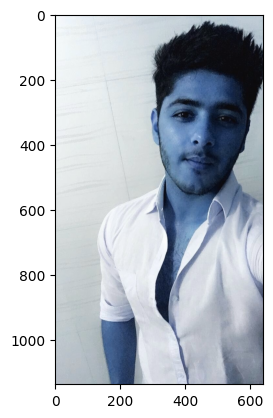

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img =cv2.resize(test_img,(150,150))

In [ ]:
test_input =test_img.reshape((1,150,150,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 42ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/IMG_20210514_034352_295.jpeg')